### Create a notebook.
### Connect the notebook to your GitHub account.
### Import the necessary libraries (SQLite3, Pandas, Matplotlib, and ipywidgets).

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Acecss the datababse and examine the schema

In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('enron.db')

In [3]:
# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Example: Execute an SQL query to retrieve all records from a table
cursor.execute("SELECT name, sql FROM sqlite_master WHERE type='table'")

# Fetch all the records
tables = cursor.fetchall()

# Iterate over the tables and display the schema
for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    
    # Get the table schema
    cursor.execute(f"PRAGMA table_info({table_name})")
    schema = cursor.fetchall()
    
    # Print the column names and data types
    for column in schema:
        column_name = column[1]
        data_type = column[2]
        print(f"Column: {column_name}, Data Type: {data_type}")
    
    print("---------------------------")


Table: employeelist
Column: eid, Data Type: INTEGER
Column: firstName, Data Type: VARCHAR(31)
Column: lastName, Data Type: VARCHAR(31)
Column: Email_id, Data Type: VARCHAR(31)
Column: Email2, Data Type: VARCHAR(31)
Column: Email3, Data Type: VARCHAR(31)
Column: EMail4, Data Type: VARCHAR(31)
Column: folder, Data Type: VARCHAR(31)
Column: status, Data Type: VARCHAR(50)
---------------------------
Table: message
Column: mid, Data Type: INTEGER
Column: sender, Data Type: VARCHAR(127)
Column: date, Data Type: DATETIME
Column: message_id, Data Type: VARCHAR(127)
Column: subject, Data Type: TEXT
Column: body, Data Type: TEXT
Column: folder, Data Type: VARCHAR(127)
---------------------------
Table: recipientinfo
Column: rid, Data Type: INTEGER
Column: mid, Data Type: INTEGER
Column: rtype, Data Type: TEXT
Column: rvalue, Data Type: VARCHAR(127)
Column: dater, Data Type: DATETIME
---------------------------
Table: referenceinfo
Column: rfid, Data Type: INTEGER
Column: mid, Data Type: INTEGER


### Data extraction and manipulation

In [4]:
# Execute the SQL query and fetch the results into a DataFrame
query = '''
    SELECT sender, rvalue AS recipient, date, subject, body
    FROM message
    JOIN recipientinfo ON message.mid = recipientinfo.mid
'''
df = pd.read_sql_query(query, conn)

# Display the DataFrame
display(df)

,sender,recipient,date,subject,body
0,press.release@enron.com,all.worldwide@enron.com,2000-01-21 04:51:00,ENRON HOSTS ANNUAL ANALYST CONFERENCE PROVIDES...,HOUSTON - Enron Corp. hosted its annual equity...
1,office.chairman@enron.com,all.downtown@enron.com,2000-01-24 01:37:00,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron..."
2,office.chairman@enron.com,all.enron-worldwide@enron.com,2000-01-24 02:06:00,Over $50 -- You made it happen!,"On Wall Street, people are talking about Enron..."
3,press.release@enron.com,all.worldwide@enron.com,2000-02-02 10:21:00,ROAD-SHOW.COM Q4i.COM CHOOSE ENRON TO DELIVER ...,"HOUSTON =01) Enron Broadband Services (EBS), a..."
4,office.chairman@enron.com,all_enron_north.america@enron.com,2000-02-07 22:16:00,Fortune Most Admired Ranking,Congratulations! For an unprecedented five ye...
...,...,...,...,...,...
2064437,pete.davis@enron.com,john.anderson@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...
2064438,pete.davis@enron.com,mark.guzman@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...
2064439,pete.davis@enron.com,michael.mier@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...
2064440,pete.davis@enron.com,pete.davis@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...


In [5]:
# Filter the DataFrame with specific sender email
filtered_df = df[df['sender'] == 'pete.davis@enron.com']
display(filtered_df)

,sender,recipient,date,subject,body
1456862,pete.davis@enron.com,pete.davis@enron.com,2002-02-04 02:37:02,Start Date: 2/4/02; HourAhead hour: 5;,X-FileName: geir solberg 6-26-02.PSTStart Date...
1456863,pete.davis@enron.com,albert.meyers@enron.com,2002-02-04 02:37:02,Start Date: 2/4/02; HourAhead hour: 5;,X-FileName: geir solberg 6-26-02.PSTStart Date...
1456864,pete.davis@enron.com,bill.williams@enron.com,2002-02-04 02:37:02,Start Date: 2/4/02; HourAhead hour: 5;,X-FileName: geir solberg 6-26-02.PSTStart Date...
1456865,pete.davis@enron.com,craig.dean@enron.com,2002-02-04 02:37:02,Start Date: 2/4/02; HourAhead hour: 5;,X-FileName: geir solberg 6-26-02.PSTStart Date...
1456866,pete.davis@enron.com,geir.solberg@enron.com,2002-02-04 02:37:02,Start Date: 2/4/02; HourAhead hour: 5;,X-FileName: geir solberg 6-26-02.PSTStart Date...
...,...,...,...,...,...
2064437,pete.davis@enron.com,john.anderson@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...
2064438,pete.davis@enron.com,mark.guzman@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...
2064439,pete.davis@enron.com,michael.mier@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...
2064440,pete.davis@enron.com,pete.davis@enron.com,2002-02-07 05:38:14,Start Date: 2/7/02; HourAhead hour: 4;,X-FileName: Start Date: 2/7/02; HourAhead hour...


In [6]:
# Group by sender and count the number of emails sent by each sender
grouped_df = df.groupby('sender').size().reset_index(name='num_emails')
display(grouped_df)

,sender,num_emails
0,-persson@ricemail.ricefinancial.com,5
1,01019@salespoint.dealerconnection.com,4
2,01@ftenergy.com,3
3,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
4,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
...,...,...
17522,ztrizna@pol.net,1
17523,zufferli@enron.com,2
17524,zulie.flores@enron.com,187
17525,zvo2z17d0@untappedmarkets.com,1


In [7]:
# Aggregate the number of emails sent by each sender
aggregated_df = df.groupby('sender').agg({'date': 'max', 'body': 'count'}).reset_index()
display(aggregated_df)

,sender,date,body
0,-persson@ricemail.ricefinancial.com,2001-08-23 09:29:45,5
1,01019@salespoint.dealerconnection.com,2001-10-09 13:18:52,4
2,01@ftenergy.com,2001-10-15 00:55:46,3
3,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,2001-10-17 16:11:23,1
4,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,2001-10-18 10:54:37,1
...,...,...,...
17522,ztrizna@pol.net,2001-05-25 05:55:00,1
17523,zufferli@enron.com,2001-05-07 05:59:25,2
17524,zulie.flores@enron.com,2001-11-19 15:11:20,187
17525,zvo2z17d0@untappedmarkets.com,2001-12-27 03:53:37,1


In [8]:
# identifying total missing vaues in each table
# Define a list of table names
table_names = ['employeelist', 'message', 'recipientinfo', 'referenceinfo']

# Iterate over the tables and check for missing values
for table_name in table_names:
    # Read the table into a DataFrame
    query = f"SELECT * FROM {table_name}"
    df = pd.read_sql_query(query, conn)
    
    # Count the missing values for each column
    missing_values = df.isnull().sum()
    
    # Display the table name and missing value counts
    print(f"Table: {table_name}")
    print(missing_values)
    print("---------------------------")

Table: employeelist
eid          0
firstName    0
lastName     0
Email_id     0
Email2       0
Email3       0
EMail4       0
folder       0
status       1
dtype: int64
---------------------------
Table: message
mid           0
sender        0
date          0
message_id    0
subject       0
body          0
folder        0
dtype: int64
---------------------------
Table: recipientinfo
rid             0
mid             0
rtype           0
rvalue          0
dater     2064442
dtype: int64
---------------------------
Table: referenceinfo
rfid         0
mid          0
reference    0
dtype: int64
---------------------------


### Email Traffic Over Time

date
1979-12-31    6
1997-01-01    1
1998-01-04    1
1998-01-05    1
1998-10-30    3
             ..
2020-12-24    1
2020-12-29    1
2043-12-28    1
2044-01-02    1
2044-01-04    2
Length: 1220, dtype: int64

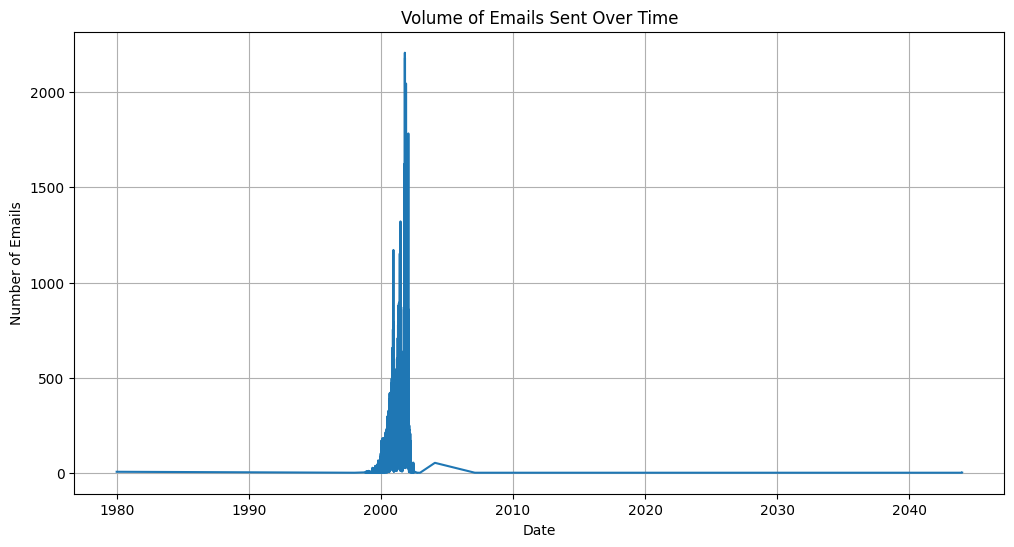

In [9]:
# Execute SQL query to fetch the data
query = '''
    SELECT date
    FROM message
'''
df = pd.read_sql_query(query, conn)

# Convert the 'date' column to datetime data type
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Remove rows with missing or invalid date values
df = df.dropna(subset=['date'])

# Count the number of messages per day
daily_count = df.groupby(df['date'].dt.date).size()
display(daily_count)

# Plot the time series line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_count.index, daily_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.title('Volume of Emails Sent Over Time')
plt.grid(True)
plt.show()


### Top Senders and Recipients

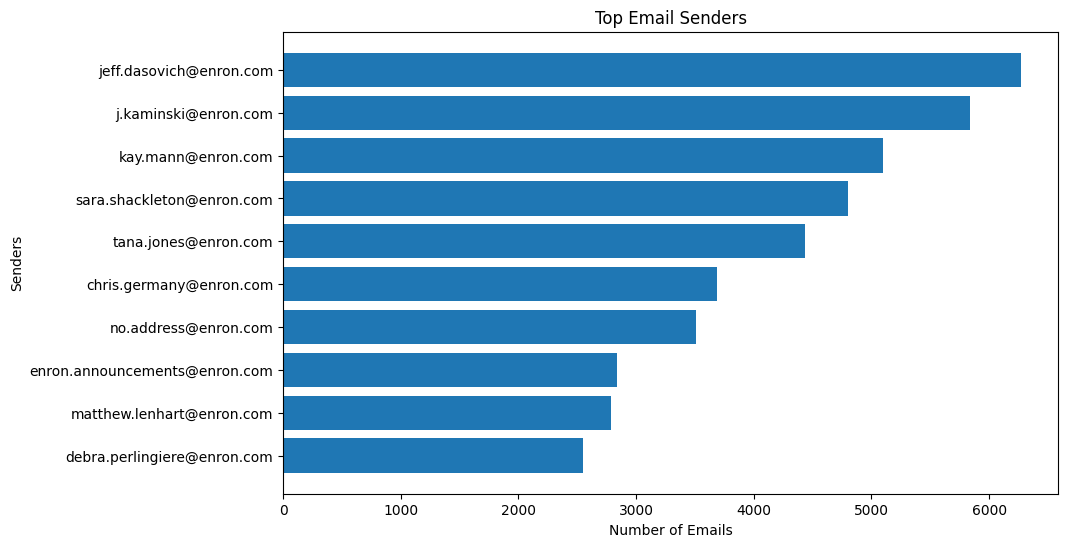

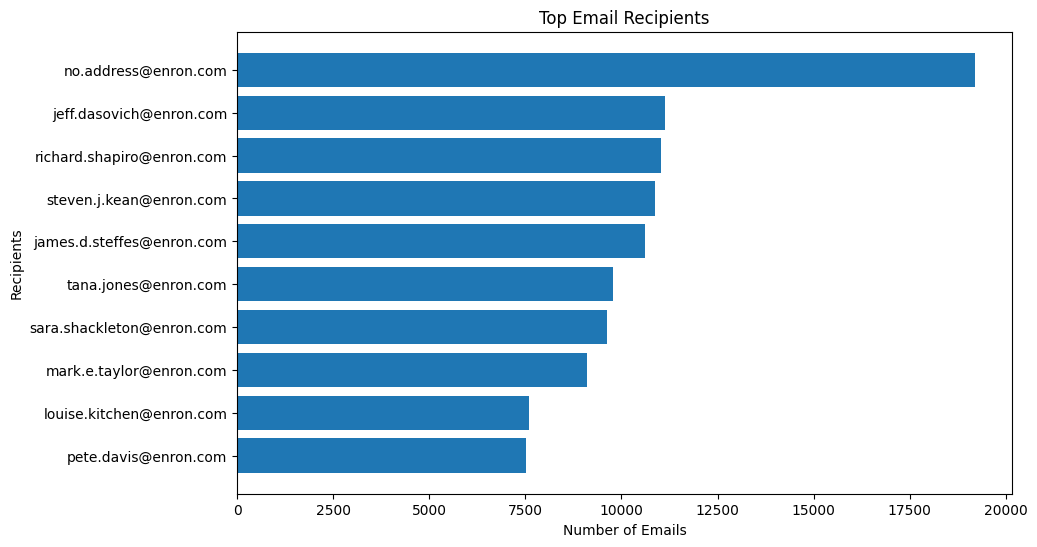

In [10]:
# Execute SQL queries to fetch the data
sender_query = '''
    SELECT sender, COUNT(*) AS count
    FROM message
    GROUP BY sender
    ORDER BY count DESC
    LIMIT 10
'''
recipient_query = '''
    SELECT rvalue AS recipient, COUNT(*) AS count
    FROM recipientinfo
    GROUP BY recipient
    ORDER BY count DESC
    LIMIT 10
'''
sender_df = pd.read_sql_query(sender_query, conn)
recipient_df = pd.read_sql_query(recipient_query, conn)

# Plot the horizontal bar chart for top senders
plt.figure(figsize=(10, 6))
plt.barh(sender_df['sender'], sender_df['count'])
plt.xlabel('Number of Emails')
plt.ylabel('Senders')
plt.title('Top Email Senders')
plt.gca().invert_yaxis()
plt.show()

# Plot the horizontal bar chart for top recipients
plt.figure(figsize=(10, 6))
plt.barh(recipient_df['recipient'], recipient_df['count'])
plt.xlabel('Number of Emails')
plt.ylabel('Recipients')
plt.title('Top Email Recipients')
plt.gca().invert_yaxis()
plt.show()

### Internal vs External Communication

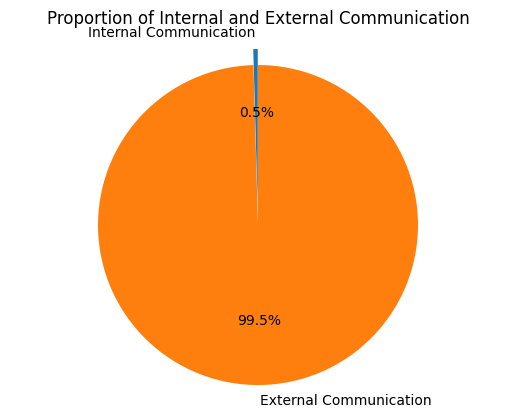

In [11]:
# Execute SQL queries to fetch the data
internal_query = '''
    SELECT COUNT(*) AS count
    FROM message m
    JOIN recipientinfo r ON m.mid = r.mid
    JOIN employeelist e ON m.sender = e.Email_id AND r.rvalue = e.Email_id
'''
external_query = '''
    SELECT COUNT(*) AS count
    FROM message m
    JOIN recipientinfo r ON m.mid = r.mid
    LEFT JOIN employeelist e ON r.rvalue = e.Email_id
    WHERE e.Email_id IS NULL
'''
internal_count = pd.read_sql_query(internal_query, conn)['count'][0]
external_count = pd.read_sql_query(external_query, conn)['count'][0]

# Calculate proportions
total_count = internal_count + external_count
internal_proportion = internal_count / total_count
external_proportion = external_count / total_count

# Create a pie chart
labels = ['Internal Communication', 'External Communication']
sizes = [internal_proportion, external_proportion]
colors = ['#1f77b4', '#ff7f0e']
explode = [0.1, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportion of Internal and External Communication')
plt.show()

### Email Distribution by Recipient Type

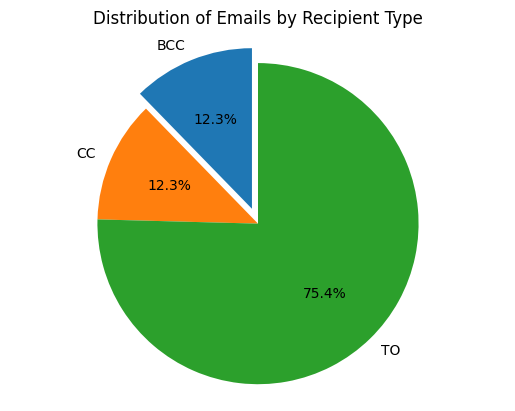

In [12]:
# Execute SQL query to fetch the data
query = '''
    SELECT rtype, COUNT(*) AS count
    FROM recipientinfo
    GROUP BY rtype
'''
df = pd.read_sql_query(query, conn)

# Create a pie chart
labels = df['rtype']
sizes = df['count']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
explode = [0.1, 0, 0]

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Emails by Recipient Type')
plt.show()

### Subject Keyword Analysis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zainh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


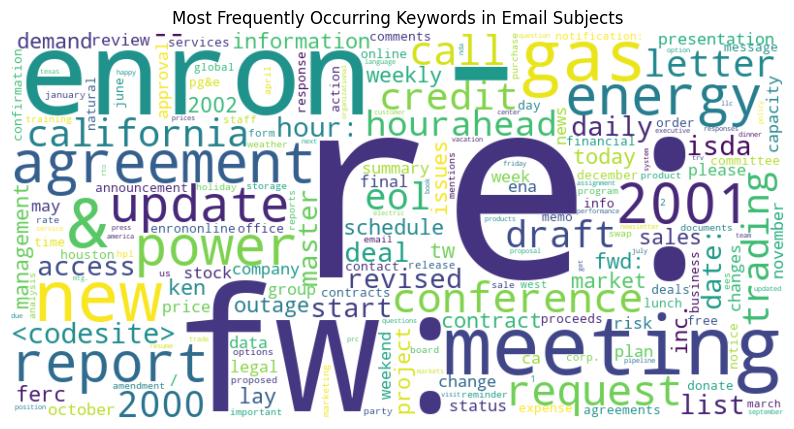

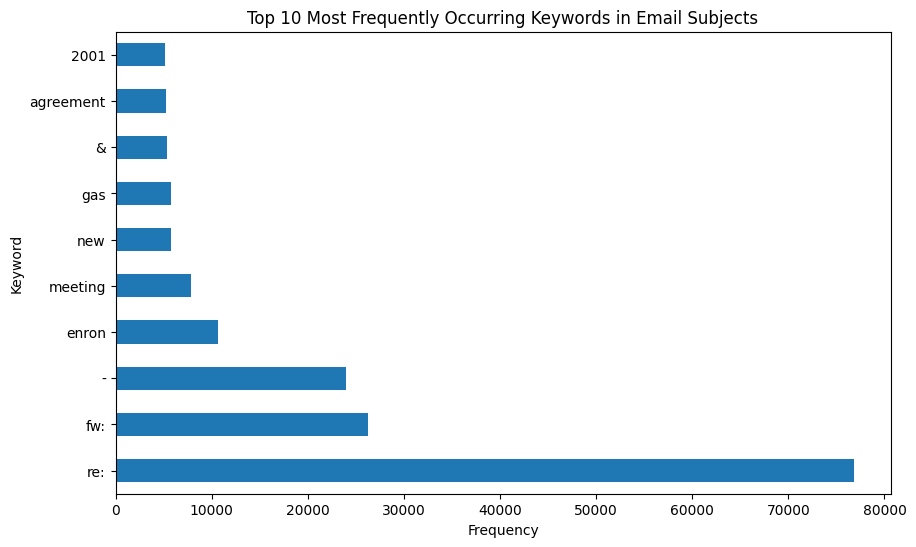

In [17]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download NLTK stopwords resource
nltk.download('stopwords')

# Connect to the SQLite database
conn = sqlite3.connect('enron.db')

# Execute SQL query to fetch the data
query = '''
    SELECT subject
    FROM message
'''
df = pd.read_sql_query(query, conn)

# Extract keywords from email subjects
keywords = []
stop_words = set(stopwords.words('english'))

for subject in df['subject']:
    subject_words = subject.lower().split()
    keywords.extend([word for word in subject_words if word not in stop_words])

# Calculate the frequency of each keyword
keyword_counts = pd.Series(keywords).value_counts().sort_values(ascending=False)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_counts)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequently Occurring Keywords in Email Subjects')
plt.show()

# Alternatively, create a horizontal bar chart
plt.figure(figsize=(10, 6))
keyword_counts[:10].plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title('Top 10 Most Frequently Occurring Keywords in Email Subjects')
plt.show()